## Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Funções

In [ ]:
def dens_rect(rho_0, eta, a, b, omega):
  omega = omega*2*np.pi
  nu = eta/rho_0
  inner=0
  for k in range(200):
    for n in range(200):
      alpha_k = (np.pi/a)*(k+(1/2))
      beta_n = (np.pi/b)*(n+(1/2))
      inner += ((alpha_k**2)*(beta_n**2)*((alpha_k**2)+(beta_n**2)+(1j*(omega/nu))))**(-1)
  rho_eq = rho_0*((nu*(a**2)*(b**2))/(4*1j*omega))*(inner**(-1))
  return rho_eq

In [ ]:
def comp_rect(P_0, gamma, a, b, omega, kappa, Cv, rho_0):
  omega = omega*2*np.pi
  nu_linha = kappa/(rho_0*Cv)
  inner = 0
  for k in range(200):
    for n in range(200):
      alpha_k = (np.pi/a)*(k+(1/2))
      beta_n = (np.pi/b)*(n+(1/2))
      inner += ((alpha_k**2)*(beta_n**2)*((alpha_k**2)+(beta_n**2)+(1j*((omega*gamma)/nu_linha))))**(-1)
  C_eq = (1/P_0)*(1-(((4*1j*omega*(gamma-1))/(nu_linha*(a**2)*(b**2)))*inner))
  return C_eq

## Definição de Parâmetros

In [ ]:
P_0 = 101320 #Pressão Atmosférica
rho_0 = 1.21 #Densidade do Ar
c_0 = 343.6 #Velocidade do Som do Ar
gamma = 1.41 #Razão entre Capacidades Térmicas
eta = 1.84e-5 #Viscosidade Dinâmica do Ar
Pr = 0.71 #Número de Prandtl
kappa = 0.026 #Condutividade Térmica
Cv = 712.05 #Calor Específico a Volume Constante
Cp = 1004 #Calor Específico a Pressão Constante

## Parâmetros: Densidade Complexa, Compressibilidade Complexa, Constante de Propagação, Velocidade de Propagação, Impedância Acústica

In [ ]:
## Definindo a largura e alturas
a = 15e-3/2
all_b = [(10e-3)/2, (7.5e-3)/2, (3.5e-3)/2, (2e-3)/2]
labels = ['A1:10mm', 'A2:7.5mm', 'A3:3.5mm', 'A4:2mm']
## Definindo Vetor de Frequências
omega = np.arange(100,1100,1)

In [ ]:
## Calculando a Densidade Complexa
all_rho = []
for b in all_b:
  rho_var = dens_rect(rho_0=rho_0,
                      eta=eta,
                      a=a,
                      b=b,
                      omega=omega)
  all_rho.append(rho_var)

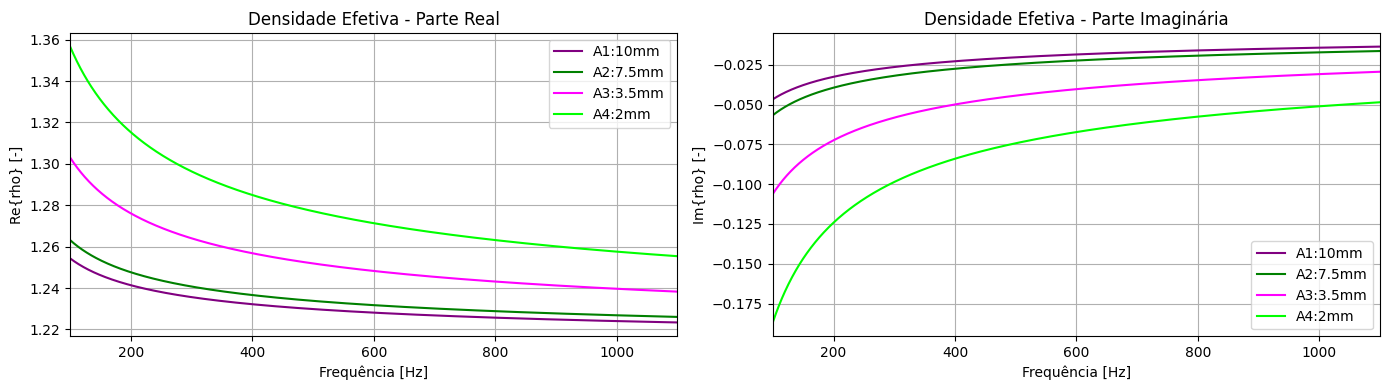

In [ ]:
colors = ['purple', 'green', 'magenta', 'lime']
## Plot da Densidade Efetiva - Parte Real e Imaginária
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
for i, rho in enumerate(all_rho):
  ax1.plot(omega, np.real(rho), label=labels[i], color=colors[i])
ax1.set_title('Densidade Efetiva - Parte Real')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{rho} [-]')
ax1.set_xlim([100,1100])
# ax1.set_ylim([1,1.5])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
for i, rho in enumerate(all_rho):
  ax2.plot(omega, np.imag(rho), label=labels[i], color=colors[i])
ax2.set_title('Densidade Efetiva - Parte Imaginária')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{rho} [-]')
ax2.set_xlim([100,1100])
# ax2.set_ylim([-15,2])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [ ]:
## Calculando a Compressibilidade Complexa
all_C = []
for b in all_b:
  C_var = comp_rect(P_0=P_0,
                    gamma = gamma,
                    a=a,
                    b=b,
                    omega=omega,
                    kappa=kappa,
                    Cv=Cv,
                    rho_0=rho_0)
  all_C.append(C_var)

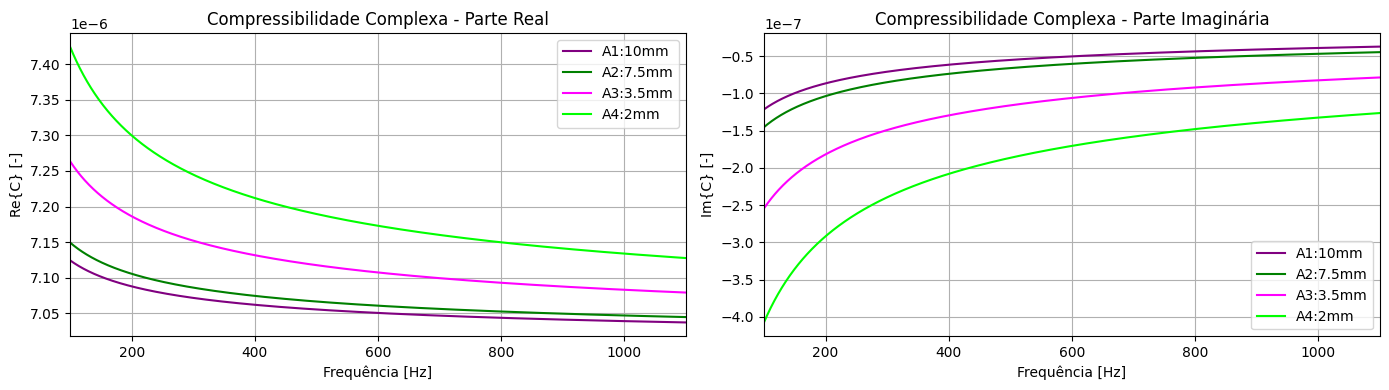

In [ ]:
colors = ['purple', 'green', 'magenta', 'lime']
## Plot da Compressibilidade Complexa - Parte Real e Imaginária
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
for i, C in enumerate(all_C):
  ax1.plot(omega, np.real(C), label=labels[i], color=colors[i])
ax1.set_title('Compressibilidade Complexa - Parte Real')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{C} [-]')
ax1.set_xlim([100,1100])
# ax1.set_ylim([1,1.5])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
for i, C in enumerate(all_C):
  ax2.plot(omega, np.imag(C), label=labels[i], color=colors[i])
ax2.set_title('Compressibilidade Complexa - Parte Imaginária')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{C} [-]')
ax2.set_xlim([100,1100])
# ax2.set_ylim([-15,2])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [ ]:
## Cálculo da Constante de Propagação
all_m = []
for i, b in enumerate(all_b):
  m_var = (omega*2*np.pi) * np.sqrt(all_rho[i]*all_C[i])
  all_m.append(m_var)
## Cálculo do Número de Onda do Ar
k0 =(omega*2*np.pi)/c_0

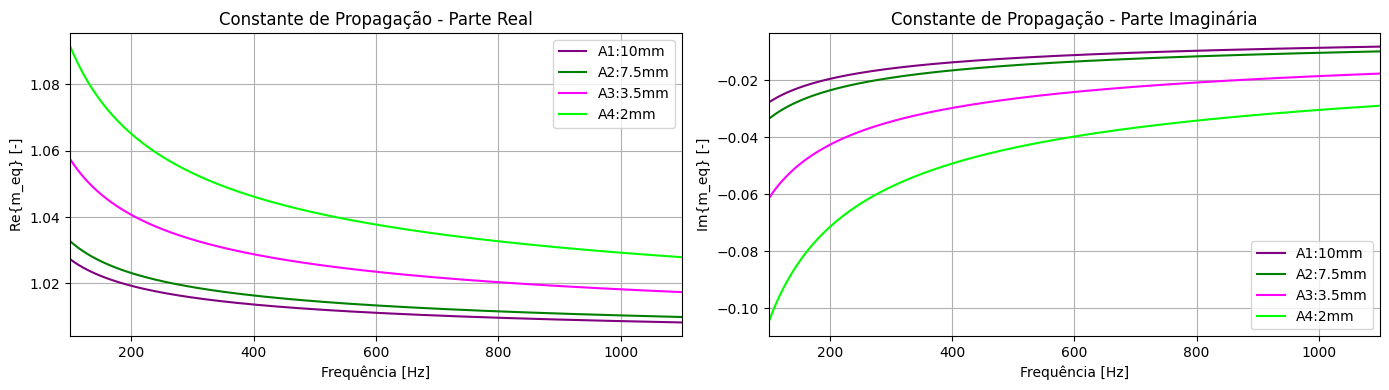

In [ ]:
colors = ['purple', 'green', 'magenta', 'lime']
## Plot da Coonstante de Propagação - Parte Real e Imaginária
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
for i, m in enumerate(all_m):
  ax1.plot(omega, np.real(m/k0), label=labels[i], color=colors[i])
ax1.set_title('Constante de Propagação - Parte Real')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{m_eq} [-]')
ax1.set_xlim([100,1100])
# ax1.set_ylim([1,1.5])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
for i, m in enumerate(all_m):
  ax2.plot(omega, np.imag(m/k0), label=labels[i], color=colors[i])
ax2.set_title('Constante de Propagação - Parte Imaginária')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{m_eq} [-]')
ax2.set_xlim([100,1100])
# ax2.set_ylim([-15,2])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [ ]:
## Cálculo da Constante de Propagação
all_c = []
for i, b in enumerate(all_b):
  c_var = 1 / np.sqrt(all_rho[i]*all_C[i])
  all_c.append(c_var)

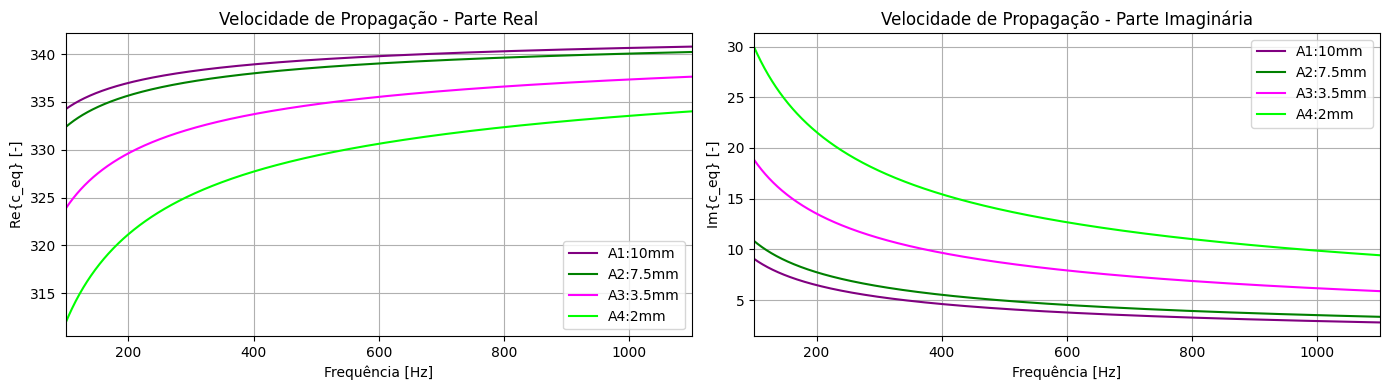

In [ ]:
colors = ['purple', 'green', 'magenta', 'lime']
## Plot da Velocidade de Propagação - Parte Real e Imaginária
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
for i, c in enumerate(all_c):
  ax1.plot(omega, np.real(c), label=labels[i], color=colors[i])
ax1.set_title('Velocidade de Propagação - Parte Real')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{c_eq} [-]')
ax1.set_xlim([100,1100])
# ax1.set_ylim([1,1.5])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
for i, c in enumerate(all_c):
  ax2.plot(omega, np.imag(c), label=labels[i], color=colors[i])
ax2.set_title('Velocidade de Propagação - Parte Imaginária')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{c_eq} [-]')
ax2.set_xlim([100,1100])
# ax2.set_ylim([-15,2])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [ ]:
## Cálculo da Impedância Característica
all_Z = []
for i, b in enumerate(all_b):
  Z_var = np.sqrt(all_rho[i]/all_C[i])
  all_Z.append(Z_var)

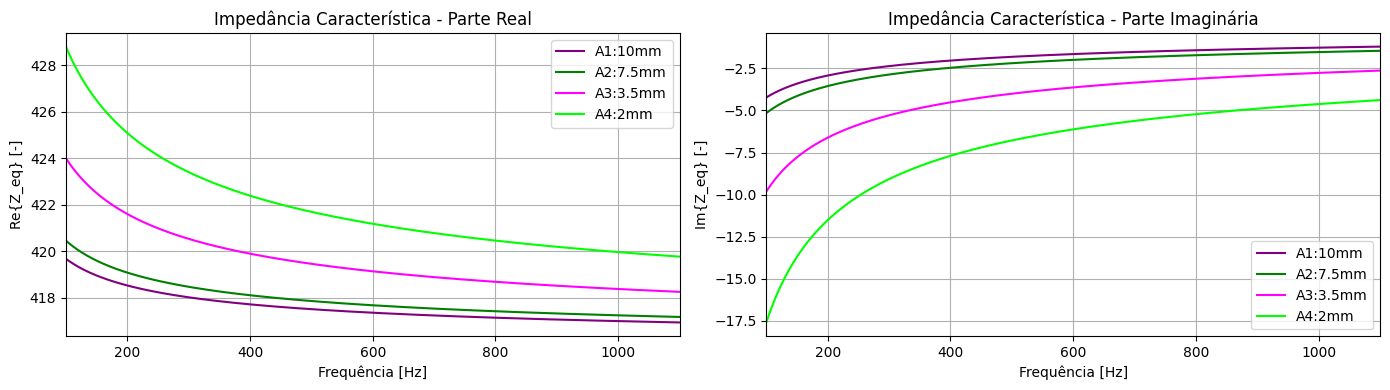

In [ ]:
colors = ['purple', 'green', 'magenta', 'lime']
## Plot da Velocidade de Propagação - Parte Real e Imaginária
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
for i, Z in enumerate(all_Z):
  ax1.plot(omega, np.real(Z), label=labels[i], color=colors[i])
ax1.set_title('Impedância Característica - Parte Real')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{Z_eq} [-]')
ax1.set_xlim([100,1100])
# ax1.set_ylim([1,1.5])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
for i, Z in enumerate(all_Z):
  ax2.plot(omega, np.imag(Z), label=labels[i], color=colors[i])
ax2.set_title('Impedância Característica - Parte Imaginária')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{Z_eq} [-]')
ax2.set_xlim([100,1100])
# ax2.set_ylim([-15,2])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()